第二十三章 人脸识别

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

人脸识别的前提是人脸检测，将包含人脸的图像归为“正类”，不包含的归为“负类”。

级联分类器 : 多个简单的分类器按照一定的顺序级联而成。

OpenCV提供了三种不同的训练好的级联分类器。

Haar级联分类器
用于人脸定位。
Haar特征反映的是图像的灰度变化，它将像素划分为模块后求差值。Haar特征用黑白两种矩形框组合成特征模板，在特征模板内，用白色矩形像素块的像素和减去黑色矩形像素块的像素和来表示该模板的特征。经过上述处理后，人脸部的一些特征就可以使用矩形框的差值简单地表示了。比如，眼睛的颜色要比脸颊的颜色深。

关于Harr特征中的矩形框，有如下3个变量。
1.矩形位置：矩形框要逐像素地划过（遍历）整个图像获取每个位置的差值。
2.矩形大小：矩形的大小可以根据需要做任意调整。
3.矩形类型：包含垂直、水平、对角等不同类型。
这样计算量过大，之后引入积分图像和级联分类器，大大降低了复杂度。

加载级联分类器的语法格式为：
<CascadeClassifier object> = cv2.CascadeClassifier(filename)
其中filename是分类器的路径和名称

人脸检测使用的是，cv2.CascadeClassifier.detectMultiScale() 函数,具体语法格式如下
objects = cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[,flags[,minSize[,maxSize]]]]])
scaleFactor : 表示在前后两次相继的扫描中，搜索窗口的缩放比例。
minNeighbors : 表示构成检测目标的相邻矩形的最小个数。一般认为是3，为了精确度可以提高。
flags : 通常被省略。
minSize : 目标的最小尺寸，小于这个尺寸的目标将被忽略。
objects : 返回值，目标对象的矩形框向量组。

[[289  12  77  77]
 [ 36  77  61  61]
 [566  65  62  62]
 [444  63  68  68]
 [129  60  61  61]]
发现5个人脸!


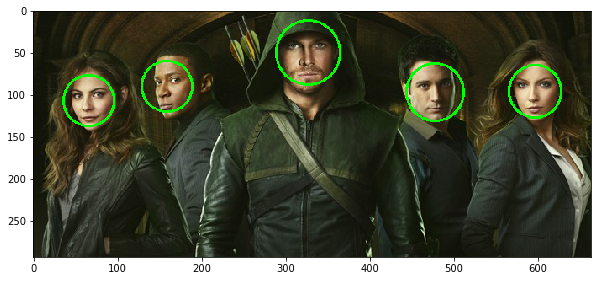

In [5]:
#人脸检测案例
image = cv2.imread('dface3.jpg')  #读取待检测图像
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #获取XML文件，加载人脸检测器
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #色彩转换，转换为灰度图像
faces = faceCascade.detectMultiScale(
                    gray,
                    scaleFactor = 1.15, #搜索窗口的缩放比例
                    minNeighbors = 5,
                    minSize = (5,5)
                            )
print(faces)  #打印输出的测试结果
print("发现{0}个人脸!".format(len(faces)))
#逐个标注人脸
for (x,y,w,h) in faces:
    #cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2) #矩形标注
    cv2.circle(image,(int((x+x+w)/2),int((y+y+h)/2)),int(w/2),(0,255,0),2)
#显示结果
plt.figure(figsize=(10,10))   #plt.figure(dpi=80)可以指定像素大小
show(image)

(616, 1122, 3)
[[ 947  281   25   25]
 [ 387  189   50   50]
 [ 638  183   41   41]
 [ 524  183   46   46]
 [ 747  190   43   43]
 [  44  194   41   41]
 [ 867  192   51   51]
 [ 171   87   40   40]
 [ 262  191   48   48]
 [ 976  197   47   47]
 [ 261  116   36   36]
 [ 703  124   35   35]
 [ 422  122   44   44]
 [ 986  115   44   44]
 [ 320  142   44   44]
 [ 944   78   38   38]
 [ 150  206   44   44]
 [ 526  139   39   39]
 [  82  233   41   41]
 [ 322  230   47   47]
 [1022  242   44   44]
 [ 451  230   55   55]
 [ 197  234   52   52]
 [ 597  223   50   50]
 [ 931  225   49   49]
 [ 801  218   52   52]
 [ 717  222   49   49]]
发现27个人脸!


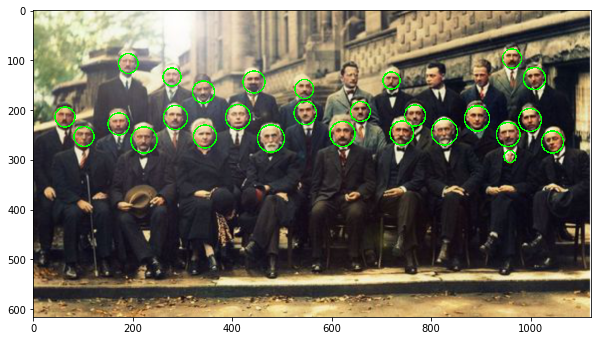

In [41]:
#人脸检测案例
#该例 说明图像的大小也会影响识别度，将图像放大一倍后，原本无法识别的人脸也能识别出来
image = cv2.imread('dface2.jpg')  #读取待检测图像
#print(image.shape)

image = cv2.pyrUp(image)
print(image.shape)
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #获取XML文件，加载人脸检测器
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #色彩转换，转换为灰度图像
faces = faceCascade.detectMultiScale(
                    gray,
                    scaleFactor = 1.15, #搜索窗口的缩放比例
                    minNeighbors = 2,
                    minSize = (1,1),
                    maxSize = (200,200)
                            )
print(faces)  #打印输出的测试结果
print("发现{0}个人脸!".format(len(faces)))
#逐个标注人脸
for (x,y,w,h) in faces:
    #cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2) #矩形标注
    cv2.circle(image,(int((x+x+w)/2),int((y+y+h)/2)),int(w/2),(0,255,0),2)
#显示结果
plt.figure(figsize=(10,10))   #plt.figure(dpi=80)可以指定像素大小
show(image)

[[ 72  64  50  50]
 [181  33  49  49]
 [252  23  44  44]]
发现3个人脸!


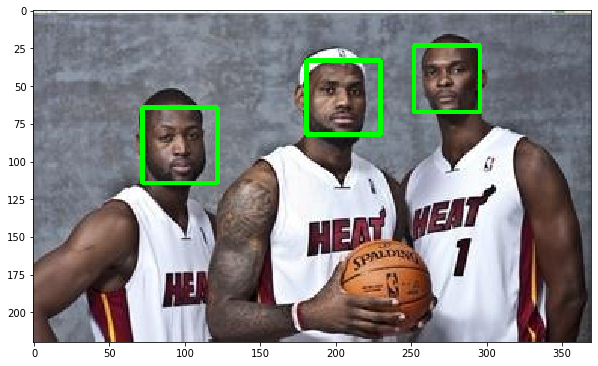

In [45]:
#人脸检测案例
image = cv2.imread('dface.jpg')  #读取待检测图像


faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #获取XML文件，加载人脸检测器
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #色彩转换，转换为灰度图像
faces = faceCascade.detectMultiScale(
                    gray,
                    scaleFactor = 1.15, #搜索窗口的缩放比例
                    minNeighbors = 15,
                    minSize = (5,5)
                            )
print(faces)  #打印输出的测试结果
print("发现{0}个人脸!".format(len(faces)))
#逐个标注人脸
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2) #矩形标注
    #cv2.circle(image,(int((x+x+w)/2),int((y+y+h)/2)),int(w/2),(0,255,0),2)
#显示结果
plt.figure(figsize=(10,10))   #plt.figure(dpi=80)可以指定像素大小
show(image)

人脸识别
人脸识别的第一步就是要找一个模型可以用简介又具有差异性的方式准确反映出每个人脸的特征。
识别人脸时，先将当前人脸采用与前述同样的方式提取特征，再从已有特征集中找出当前特征的最邻近样本，从而得到当前人脸的标签。

OpenCV提供了三种人脸识别方法，分别是LBPH、EigenFishfaces、Fisherfaces

LBPH人脸识别（Local Binary Patterns Histogram,局部二值模式直方图）
原理：将像素点A的值与其最邻近的8个像素点的值逐一比较；
如果A的像素值大于其临近点的像素值，则得到0.
如果A的像素值大于其临近点的像素值，则得到1。
最后，将像素点A与其周围8个像素点比较所得到的0、1值连起来，得到一个8位的二进制序列，将该二进制序列转换为十进制数作为点A的LBP值。
需要注意的是，邻域的定义可以改变，比如可以使用圆形邻域。

人脸的整体灰度会受到光线的影响。但是人脸各部分之间的相对灰度会基本保持一致。
LBP的主要思想是以当前点与其邻域像素的相对关系作为处理结果，正因如此，图像灰度整体发生变化时，LBP提取特征的能力不会受到影响。

具体步骤：
1.采用cv2.face.LBPHFaceRecognizer_create()生成LBPH识别器实例模型，
2.应用cv2.face_FaceRecognizer.train() 完成训练
3.最后cv2.face_FaceRecognizer.predict()完成人脸识别

#生成LBPH识别器示例模型
#retval = cv2.face.LBPHFaceRecognizer_create([,radius[,neighbors[,grid_x[,grid_y[,threshold]]]]])
#radius : 半径值，默认为1
#neighbors : 邻域点的个数，默认采用8邻域
#grid_x : 将LBP特征图像划分为一个个单元格时，每个单元格在水平方向上的像素个数。默认为8
#threshold : 在预测时所使用的阈值，如果大于该阈值，就认为没有识别到任何目标对象

#完成训练
#cv2.face_FaceRecognizer.train(src,labels)
#src : 训练图像，用来学习的人脸图像
#labels : 标签，人脸图像所对应的标签

#完成人脸识别
#label, confidence = cv2.face_FaceRecognizer.predict(src)
#src : 需要识别的人脸图像
#label :返回的识别结果标签
#confidence : 返回的置信度评分，0表示完全匹配，小于50可以接受

In [44]:
#实例
images = [];
images.append(cv2.imread('a1.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('a2.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('b1.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('b2.png',cv2.IMREAD_GRAYSCALE))
labels = [0,0,1,1]
#print(labels)  #标签多的话，可以输出看看
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(images,np.array(labels))  #注意这里的写法明显是省略了的
predict_image = cv2.imread("a3.png",cv2.IMREAD_GRAYSCALE)
label,confidence = recognizer.predict(predict_image)
print("label = ",label)
print("confidence = ",confidence)

label =  0
confidence =  67.6856704732354


EigenFaces人脸识别
EigenFaces通常也被称为特征脸，它使用主成分分析（PCA）方法，将高维的人脸数据降维后，再进行分析和处理，获取识别结果。
1.使用cv2.face.EigenFaceRecognizer_create()生成特征脸识别器实例模型
2.应用cv2.face_FaceRecognizer.train()函数完成训练
3.最后cv2.face_FaceRecognizer.predict()函数完成识别

In [47]:
#retval = cv2.face.EigenFaceRecognizer_create([,num_components[,threshold]])
#num_components : PCA中要保留的分量个数，一般来说80个足矣
#threshold : 进行人脸识别时所采用的阈值
#需要注意的是，这个模型的confidence只要低于5000就是可以接受的,但是实际上，应该更加严格点
images = [];
images.append(cv2.imread('e01.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('e02.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('e11.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('e12.png',cv2.IMREAD_GRAYSCALE))
labels = [0,0,1,1]
#print(labels)  #标签多的话，可以输出看看
recognizer = cv2.face.EigenFaceRecognizer_create()
recognizer.train(images,np.array(labels))  #注意这里的写法明显是省略了的
predict_image = cv2.imread("eTest.png",cv2.IMREAD_GRAYSCALE)
label,confidence = recognizer.predict(predict_image)
print("label = ",label)
print("confidence = ",confidence)

label =  0
confidence =  1592.4971123726827


Fisherfaces人脸识别，机器学习中学过这个分类器
降维操作会损失一些特征，Fisherfaces采用LDA(Liner Discriminant Analysis, 线性判别分析)实现人脸识别。
线性判别分析在对特征进行降维的同时考虑类别信息。其思路是：在低维表示下，相同的类应该紧密地聚集在一起；不同的类应该尽可能的分开。
OpenCV具体操作步骤：
1.使用cv2.face.FisherFaceRecognizer_create()生成特征脸识别器实例模型
2.应用cv2.face_FaceRecognizer.train()函数完成训练
3.最后cv2.face_FaceRecognizer.predict()函数完成识别

In [49]:
#retval = cv2.face.FisherFaceRecognizer_create([,num_components[,threshold]])
#num_components : 保留的成分数量，默认值为0
#threshold : 进行识别时所采用的的阈值。如果最近的距离比设定的阈值threshold还要大，函数会返回-1
#需要注意的是，该方法的评分标准与EigenFaces方法一致
images = [];
images.append(cv2.imread('f01.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('f02.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('f11.png',cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread('f12.png',cv2.IMREAD_GRAYSCALE))
labels = [0,0,1,1]
#print(labels)  #标签多的话，可以输出看看
recognizer = cv2.face.FisherFaceRecognizer_create()
recognizer.train(images,np.array(labels))  #注意这里的写法明显是省略了的
predict_image = cv2.imread("fTest.png",cv2.IMREAD_GRAYSCALE)
label,confidence = recognizer.predict(predict_image)
print("label = ",label)
print("confidence = ",confidence)  #即使用错图像，仍然有1800的评分，但是和92相比还是相去甚远

label =  0
confidence =  92.5647623298737
